# Project: Bay Wheels (Ford GoBike) Data Exploration 

**By Bushra Alsunaidi**


## Table of Contents
- [Introduction](#intro)
- [Preliminary Wrangling](#wrangling)
- [Univariate Exploration](#uni)
- [Bivariate Exploration](#bi)
- [Multivariate Exploration](#multi)

<a id='intro'></a>
## Introduction

This project aims to explore Bay Wheels dataset, previousely named Ford GoBike, in July 2020. This dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

<a id='wrangling'></a>
## Preliminary Wrangling

In this process, the data will be gathered, assessed, and cleaned to analyze and visualize the data efficiently and neatly.

To get started, let's import our libraries.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Data Gathering

In [2]:
# Load the dataset into panda dataframe
df = pd.read_csv('202007-baywheels-tripdata.csv')

#### Data Assessment

In [3]:
# visualize the dataframe
df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
87930,BFAAD1824E423ABB,electric_bike,2020-07-11 10:28:16,2020-07-11 10:36:59,Bryant St at 6th St,63.0,Hyde St at Post St,369.0,37.775893,-122.402621,37.787352,-122.416385,member
98802,A957E1AAAAB49818,electric_bike,2020-07-12 12:29:07,2020-07-12 13:03:47,NaN,NaN,Grove St at Masonic Ave,375.0,37.730000,-122.370000,37.774786,-122.446712,member
126018,59806565F8C69B51,docked_bike,2020-07-12 15:21:13,2020-07-12 16:25:35,Battery St at Filbert St,500.0,Battery St at Filbert St,500.0,37.802197,-122.401771,37.802198,-122.401772,casual
126470,9DDC2BA84A8F95A8,electric_bike,2020-07-30 12:17:36,2020-07-30 12:23:37,McKinnon Ave at 3rd St,436.0,23rd St at Tennessee St,355.0,37.736253,-122.389832,37.755398,-122.388669,member
30271,1D14839719136111,electric_bike,2020-07-14 20:03:37,2020-07-14 20:03:49,NaN,NaN,NaN,NaN,37.750000,-122.420000,37.750000,-122.420000,casual


In [4]:
# A summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154967 entries, 0 to 154966
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             154967 non-null  object 
 1   rideable_type       154967 non-null  object 
 2   started_at          154967 non-null  object 
 3   ended_at            154967 non-null  object 
 4   start_station_name  102589 non-null  object 
 5   start_station_id    102589 non-null  float64
 6   end_station_name    100407 non-null  object 
 7   end_station_id      100407 non-null  float64
 8   start_lat           154967 non-null  float64
 9   start_lng           154967 non-null  float64
 10  end_lat             154771 non-null  float64
 11  end_lng             154771 non-null  float64
 12  member_casual       154967 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.4+ MB


The information summary about the dataset shows that the datatype of some variables must be fixed, which will be modified in the next step. It indicates that some variables have missing/null values.

In [5]:
# A count of the null values in the dataset
df.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    52378
start_station_id      52378
end_station_name      54560
end_station_id        54560
start_lat                 0
start_lng                 0
end_lat                 196
end_lng                 196
member_casual             0
dtype: int64

In [6]:
# A count of the duplicates in the dataset
sum(df.duplicated())

0

In [7]:
# The number of the unique value in each column
df.nunique()

ride_id               154967
rideable_type              2
started_at            147561
ended_at              147331
start_station_name       426
start_station_id         425
end_station_name         431
end_station_id           430
start_lat              44231
start_lng              45882
end_lat                44099
end_lng                45775
member_casual              2
dtype: int64

In [8]:
# check the descriptive statistics
df.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,102589.00000,100407.000000,154967.000000,154967.000000,154771.000000,154771.000000
mean,224.38394,220.963837,37.732393,-122.357516,37.732502,-122.353342
std,172.17782,172.435490,0.138354,0.167669,0.138407,0.599176
min,3.00000,3.000000,37.240000,-122.510000,37.230000,-122.510000
25%,72.00000,72.000000,37.760000,-122.433274,37.760000,-122.432532
50%,153.00000,145.000000,37.773981,-122.413233,37.773953,-122.412408
75%,385.00000,384.000000,37.788299,-122.391967,37.788472,-122.391984
max,534.00000,534.000000,37.880222,-121.770000,37.880222,-42.344893


#### Data Cleaning

In [9]:
# Create a copy of the dataset
dfc = df.copy()

In [10]:
# Fix the datatype
dfc.started_at = pd.to_datetime(dfc.started_at)
dfc.ended_at = pd.to_datetime(dfc.ended_at)
dfc.start_station_id = dfc.start_station_id.astype('str')
dfc.end_station_id = dfc.end_station_id.astype('str')
dfc.rideable_type = dfc.rideable_type.astype('category')
dfc.member_casual = dfc.member_casual.astype('category')

In [11]:
# Add a duration variable for a ride in sec
dfc['duration_sec'] = (dfc.ended_at - dfc.started_at).dt.seconds
dfc['started_day']= dfc.started_at.dt.strftime('%a')

In [12]:
# Fix the started_day to ordered category datatype
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
dfc.started_day = pd.Categorical(dfc.started_day, categories=weekdays, ordered=True)

In [13]:
# Test
dfc.dtypes

ride_id                       object
rideable_type               category
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual               category
duration_sec                   int64
started_day                 category
dtype: object

In [14]:
# Delete the rows with null values
dfc = dfc[dfc.end_station_id.notnull()==True]
dfc = dfc[dfc.end_station_name.notnull()==True]
dfc = dfc[dfc.start_station_name.notnull()==True]

In [15]:
# Test
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83530 entries, 1 to 154966
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             83530 non-null  object        
 1   rideable_type       83530 non-null  category      
 2   started_at          83530 non-null  datetime64[ns]
 3   ended_at            83530 non-null  datetime64[ns]
 4   start_station_name  83530 non-null  object        
 5   start_station_id    83530 non-null  object        
 6   end_station_name    83530 non-null  object        
 7   end_station_id      83530 non-null  object        
 8   start_lat           83530 non-null  float64       
 9   start_lng           83530 non-null  float64       
 10  end_lat             83530 non-null  float64       
 11  end_lng             83530 non-null  float64       
 12  member_casual       83530 non-null  category      
 13  duration_sec        83530 non-null  int64    

In [16]:
# Test
dfc.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_sec,started_day
19965,C92CD8EA45973784,electric_bike,2020-07-03 19:53:59,2020-07-03 20:13:18,Howard St at 8th St,61.0,7th Ave at Irving St,457.0,37.776608,-122.411233,37.763571,-122.464109,casual,1159,Fri
87104,16A1C10DC0E223F7,electric_bike,2020-07-10 18:54:54,2020-07-10 19:02:37,Market St at Dolores St,86.0,Valencia St at Clinton Park,356.0,37.769267,-122.426928,37.769024,-122.422275,member,463,Fri
95027,208A94BBA50FE47C,docked_bike,2020-07-26 19:23:23,2020-07-26 19:32:45,Mission Playground,121.0,8th St at Ringold St,60.0,37.759210,-122.421339,37.774520,-122.409449,member,562,Sun
152382,D6121C0FB42DE8D6,electric_bike,2020-07-27 18:30:27,2020-07-27 18:40:38,7th Ave at Irving St,457.0,Page St at Scott St,72.0,37.763627,-122.464094,37.772411,-122.435852,member,611,Mon
100701,8396929BABEDF5C2,docked_bike,2020-07-29 19:46:35,2020-07-29 19:50:04,Balboa Park BART Station,413.0,Delano Ave at Oneida Ave,502.0,37.720554,-122.447723,37.722382,-122.443810,member,209,Wed


### What is the structure of your dataset?

There are 83,530 rows (trips) in the dataset with 15 columns (features). Most variables are either numeric or string in nature, but the variables rideable_type, member_casual, and started_day are categorical variables. Each trip is anonymized and includes:  
1. Ride ID
2. Bike type
3. Start Time and Date
4. End Time and Date
5. Start Station Name
6. Start Station ID
7. End Station Name
8. End Station ID
9. Start Station Latitude
10. Start Station Longitude
11. End Station Latitude
12. End Station Longitude
13. User Type (Member or Casual)
14. Trip Duration (seconds)
15. Start Day.

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out the features that would affect in increasing the bike trips through observing where the dataset is congested. This will assisst in understanding the market during the pandemic time of COVID-19 to make business decisions. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I believe user type, bike type, trip duration, started station name, and day of the week will affect the prediction of the number of trips. For instance, studying what are the most started station names or investigating on the busiest day of the week for bike rentals, etc.

<a id='uni'></a>
## Univariate Exploration

I'll start by looking at the distribution of the main variables.

#### 1. What is the busiest day of the week for bike rentals?

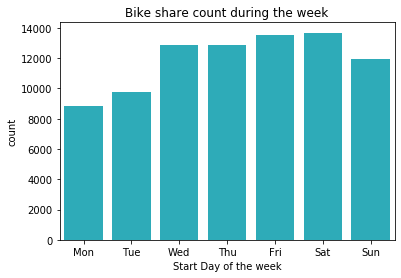

In [17]:
base_color = sb.color_palette()[9]

# create bar chart
sb.countplot(data= dfc, x = 'started_day', color = base_color)

# set title and labels 
plt.title('Bike share count during the week')
plt.xlabel('Start Day of the week');

As shown above, there is no pattern in the dataset; this might be because the students in July are spending their summer vacation. Besides, most of the employees currently are working from home due to COVID-19, which explains the reason why the bike rental rate at the weekends is higher than some of the weekdays.

#### 2. What are the 10 most common starting point?

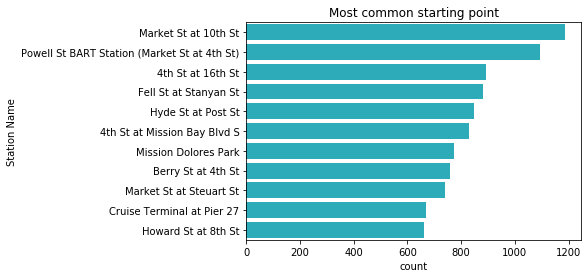

In [18]:
# count the occurrence of each class 
points = dfc['start_station_name'].value_counts()[:11].index

# create bar chart
sb.countplot(data=dfc, y='start_station_name', order=points, color=base_color)

# set title and labels 
plt.title('Most common starting point')
plt.ylabel('Station Name');

#### 3. What is the percentage of each user type?

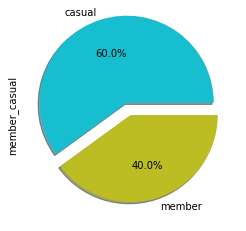

In [19]:
colors = ['tab:cyan', 'tab:olive']
# Plot a pie chart showing the rate of each
df['member_casual'].value_counts().plot(kind='pie', explode=(0.15, 0), shadow=True, 
                                  colors=colors, autopct='%1.1f%%');

#### 4. What is the percentage of each bike type?

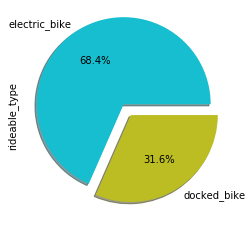

In [20]:
# Plot a pie chart showing the rate of each
df['rideable_type'].value_counts().plot(kind='pie', explode=(0.15, 0), shadow=True, 
                                  colors=colors, autopct='%1.1f%%');

#### 5. How the trip duration time is distributed?

In [21]:
# Find where the 99% of the dataset occurs
dfc['duration_sec'].describe(percentiles=[.99])

count    83530.000000
mean      1308.885837
std       3366.421455
min          0.000000
50%        797.000000
99%       7756.710000
max      86399.000000
Name: duration_sec, dtype: float64

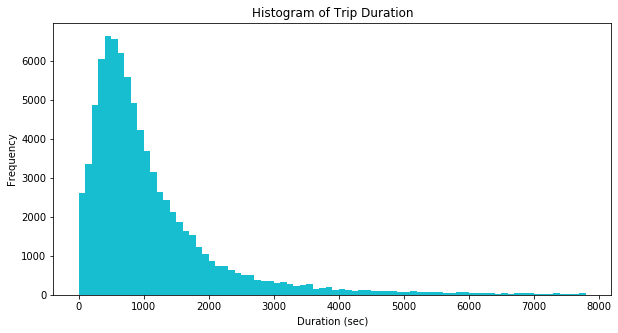

In [22]:
bins = np.arange(0, 7757+100, 100)
plt.figure(figsize=[10, 5])

plt.hist(data=dfc, x='duration_sec', bins=bins, color=base_color);
plt.title('Histogram of Trip Duration')
plt.xlabel('Duration (sec)');
plt.ylabel('Frequency');

The histogram of the trip duration has a positively skewed distribution, which mean that most of the data falls to the right. The peak of the histogram, where most of the trips occurs, is held in the interval of 500-700 seconds, i.e., most of the trips took 8-13 minutes long.

In [23]:
# Filter out the outliers of trip records
dfc = dfc.query('duration_sec <= 7757')
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82695 entries, 1 to 154966
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             82695 non-null  object        
 1   rideable_type       82695 non-null  category      
 2   started_at          82695 non-null  datetime64[ns]
 3   ended_at            82695 non-null  datetime64[ns]
 4   start_station_name  82695 non-null  object        
 5   start_station_id    82695 non-null  object        
 6   end_station_name    82695 non-null  object        
 7   end_station_id      82695 non-null  object        
 8   start_lat           82695 non-null  float64       
 9   start_lng           82695 non-null  float64       
 10  end_lat             82695 non-null  float64       
 11  end_lng             82695 non-null  float64       
 12  member_casual       82695 non-null  category      
 13  duration_sec        82695 non-null  int64    

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There was no clear pattern in the number of bike rental per week. I think this issue is because of the time of the year (vacation season) and the pandemic of COVID-19 2020. However, there is a tendency to rent a bike on the weekends. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I calculate the duration time from subtracting the start time from the end time. This variable had entries with a very long time in which the trip took about 24 hours. To visualize the data in a better way, I filtered out these outliers to focus on where the majority of the trip records occur.

<a id='bi'></a>
## Bivariate Exploration

#### 1. What is the user type distribution among the weekly bike rentals?

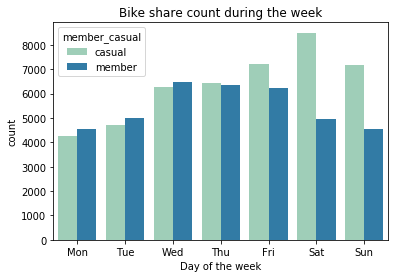

In [24]:
sb.countplot(data = dfc, x = 'started_day', hue = 'member_casual', palette="YlGnBu")
plt.title('Bike share count during the week')
plt.xlabel('Day of the week');

As illustrated above, members slightly more inclined to rent a bike on weekdays in July 2020 than casual users. However, on weekends, casual users tend to ride the Bay Wheels bike more.

#### 2. What type of bike is the most used among users?

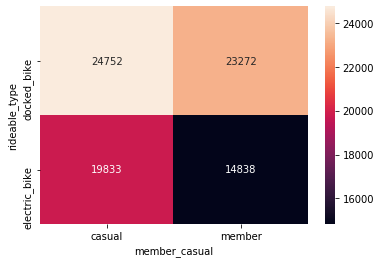

In [25]:
ct_counts = dfc.groupby(['rideable_type', 'member_casual']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'rideable_type', columns = 'member_casual', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd' );

After filtering the outliers of the duration column, it turns out that regardless of whether the rider is a member or a casual user, the docked bike was utilized more than the electric bike.

#### 3. How the duration time affects on each bike type/user type? 

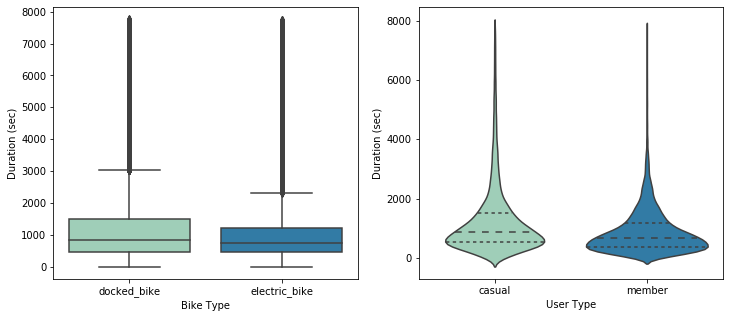

In [26]:
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
sb.boxplot(data=dfc, x='rideable_type', y='duration_sec', palette='YlGnBu');
plt.xlabel('Bike Type');
plt.ylabel('Duration (sec)');

plt.subplot(1, 2, 2)
sb.violinplot(data=dfc, x='member_casual', y='duration_sec', inner='quartile', palette='YlGnBu');
plt.xlabel('User Type');
plt.ylabel('Duration (sec)');

The electric bike has roughly less duration time trips than docked bike. Furthermore, members spend less time riding the Bay Wheels bike than casual users.

#### 5. What is the most popular starting point for members and casual users?

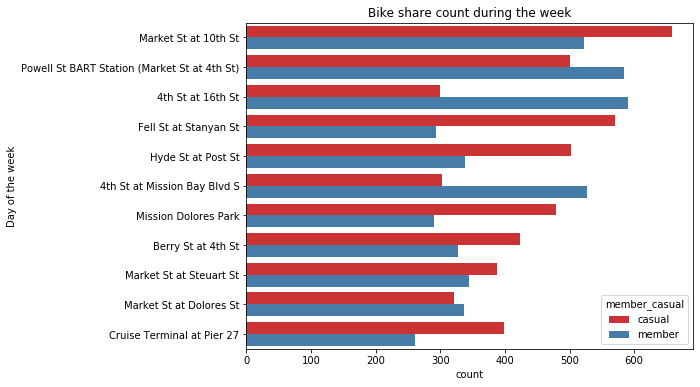

In [27]:
plt.figure(figsize = [8,6])
points = dfc['start_station_name'].value_counts()[:11].index

sb.countplot(data=dfc, y='start_station_name', hue='member_casual', order=points, palette="Set1")
plt.title('Bike share count during the week')
plt.ylabel('Day of the week');

Members mostly start their ride at *4th St at 16th St* or at *Powell St BART Station*. However, casual users most likely start their trip at *Market St at 10th St* (the center of the city).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Members slightly tend to rent a bike during the weekdays of July 2020 than the casual users, and vice versa. The docked bike was utilized more than the electric bike for both types of users. The electric bike is faster than the docked bike. Members ride short trips and vice versa.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Casual users ride the bike more at the weekends, and they spend a longer time to reach their destination.

<a id='multi'></a>
## Multivariate Exploration

#### 1. How does the average ride time differ between members and casual users on weekdays?

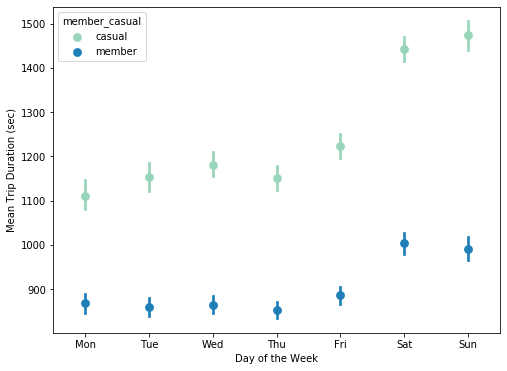

In [28]:
plt.figure(figsize = [8,6])
sb.pointplot(data=dfc, x='started_day', y='duration_sec', hue='member_casual', 
             palette='YlGnBu', linestyles = '');
plt.xlabel('Day of the Week');
plt.ylabel('Mean Trip Duration (sec)');
dfc['started_hour']= dfc.started_at.dt.hour

As shown in the foregoing graph, the average trip duration of members is less than that for casual users on each day of the week. Nevertheless, the average is higher on the weekends for both users. This shows how it become demandable to rent a bike at the weekends, especially for casual riders.

#### 2. What is the hourly usage rate for each bike type per week?

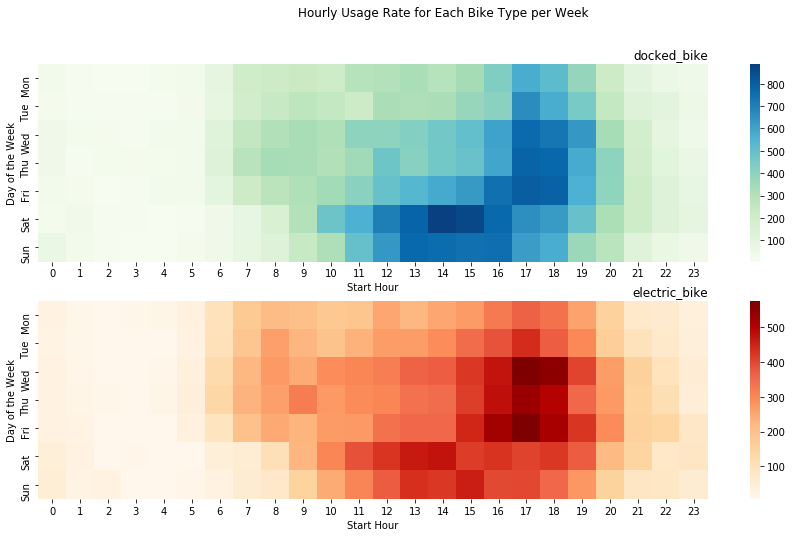

In [29]:
plt.figure(figsize = [15,8])
plt.suptitle('Hourly Usage Rate for Each Bike Type per Week')

plt.subplot(2,1,1)
docked = dfc.query('rideable_type == "docked_bike"')
dt_counts = docked.groupby(['started_day', 'started_hour']).size()
dt_counts = dt_counts.reset_index(name='count')
dt_counts = dt_counts.pivot(index='started_day', columns='started_hour', values='count')
sb.heatmap(dt_counts, cmap='GnBu');
plt.title('docked_bike', loc='right');
plt.xlabel('Start Hour');
plt.ylabel('Day of the Week');

plt.subplot(2,1,2)
electric = dfc.query('rideable_type == "electric_bike"')
et_counts = electric.groupby(['started_day', 'started_hour']).size()
et_counts = et_counts.reset_index(name='count')
et_counts = et_counts.pivot(index='started_day', columns='started_hour', values='count')
sb.heatmap(et_counts, cmap='OrRd');
plt.title('electric_bike', loc='right');
plt.xlabel('Start Hour');
plt.ylabel('Day of the Week');

The demand for a docked bike is concentrated on the weekends, especially on Saturday at 2-3 PM. However, riders tend to acquire an electric bike on the weekdays around 5-6 PM. This means that in business days, people are likely to use the electric bike so they can finish their work in a faster way. Nevertheless, they utilize the docked bike in their spare days.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the investigation, I looked in depth at the factors affecting the Bay Wheels market during July 2020. In which, I studied the riders' way to use the bike in terms of the trip duration on the corresponding day of the week. Furthermore, I investigated the hourly usage rate for each bike type per week.

These studies on the abovementioned features reinforced previous investigations through visualizing and analyzing the multivariate graphs.

### Were there any interesting or surprising interactions between features?

It is quite interesting how people still use the docked bike in their spare time. This indicates how people in San Francisco care about their health and sport even in this pandemic era.